In [1]:
from radd import build, vis
from radd.toolbox import analyze
from __future__ import division

In [2]:
iv = {'v':array([ 1.41106,  1.56252,  1.68275,  1.76071,  1.87995,  1.92475]), 'a': 0.487226, 'xb':   1.563474, 'tr':   0.292126}
itr = {'a': 0.62868, 'v': 1.421123, 'xb': 0.640829, 'tr':array([ 0.18203,  0.16131,  0.13355,  0.11741,  0.08473,  0.07697])}
ia = {'a':array([ 0.37922,  0.34356,  0.30503,  0.28076,  0.24567,  0.23642]), 'xb': 0.9136456, 'v': 1.127346, 'tr': 0.2997148}
ixb={'a': 0.48158, 'xb': array([ 0.04638,  0.1547 ,  0.37575,  0.53875,  1.29523,  1.29254]), 'tr':0.27438, 'v': 1.54521}


names = ['v', 'tr', 'a', 'xb']
inits_list = [iv, itr, ia, ixb]
for i, idc in enumerate(inits_list):
      idc[names[i]] = np.mean(idc[names[i]])

ivtr['v']=np.mean(ivtr['v'])
ivtr['tr']=np.mean(ivtr['tr'])
inits_list.append(ivtr)

In [3]:
parameter = 'tr'
depends_on = {parameter:'pGo'}
finfo_list, yhat_list = [], []
d = '/'.join(['FinalPro', parameter])
if not os.path.isdir(pth+d):
      os.mkdir(pth+d)
os.chdir(pth+d)
finfo_list, yhat_list = [], []

In [4]:
for i in range(20):
      xinits_list = [dict(deepcopy(xinit)) for xinit in inits_list]
      for xi in xinits_list:
            model = build.Model(data=prodata, kind='xpro', inits=xi, depends_on=depends_on)
            model.make_optimizer(tol=1.e-5, multiopt=True, maxfev=500)
            opt=model.opt
            opt.make_simulator()

            ydata, ywts = model.avg_y, model.avg_wts
            # STAGE 3 (Final Simplex)
            yhat, finfo, xiv = opt.gradient_descent(y=ydata, wts=ywts, inits=xi, is_flat=False)
            finfo_list.append(finfo)
            yhat_list.append(yhat)

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 99
         Function evaluations: 229
Optimization terminated successfully.
         Current function value: 0.000015
         Iterations: 95
         Function evaluations: 220
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 142
         Function evaluations: 323
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 104
         Function evaluations: 228
Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 92
         Function evaluations: 208
Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 113
         Function evaluations: 245
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 93
         Function evaluations: 218
Optimization terminated 

In [5]:
dfx = pd.DataFrame([fi.T for fi in finfo_list])
dff = dfx[['cnvrg', 'logp', 'chi', 'rchi', 'AIC', 'BIC', 'a', 'v', 'tr_0', 'tr_20', 'tr_40', 'tr_60', 'tr_80', 'tr_100', 'xb']]
dff.to_csv('xpro_tr_bootinfo.csv', index=False)
yhatdf = pd.DataFrame(np.asarray(yhat_list))
yhatdf.to_csv('xpro_tr_bootfits.csv', index=False)

In [9]:
kq = analyze.kde_fit_quantiles(yhatdf.iloc[0, 6:11])

array([ 0.51787,  0.53261,  0.54652, ...,  0.53702,  0.54647,  0.55378])

array([ 0.93996,  0.79037,  0.54775,  0.33996,  0.11803,  0.08139,
        0.50343,  0.53158,  0.54094,  0.54427,  0.54527,  0.53376,
        0.54393,  0.5447 ,  0.54517,  0.54533])

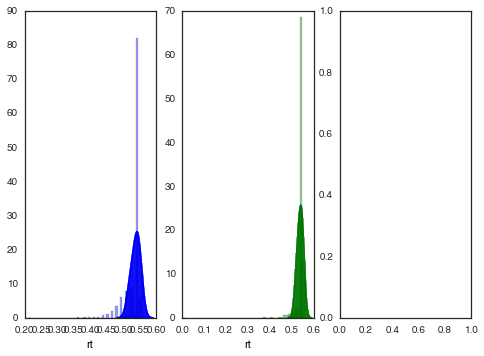

In [17]:
f, axes = plt.subplots(1,3)
y=model.avg_y

axes=axes.flatten()
sns.distplot(prodata.query('response==1&pGo>.5').rt, kde=False, norm_hist=True, color='Blue', ax=axes[0])
sns.distplot(prodata.query('response==1&pGo<.5').rt, norm_hist=True, color='Green', kde=False, ax=axes[1])
for i, yh in yhatdf.iterrows():
      hq = analyze.kde_fit_quantiles(yhatdf.iloc[0, 6:11], bw=.01)
      lq = analyze.kde_fit_quantiles(yhatdf.iloc[0, 11:], bw=.01)
      sns.kdeplot(hq, shade=True, alpha=.02, color='Blue', bw=.01, ax=axes[0])
      sns.kdeplot(lq, shade=True, alpha=.02, color='Green', bw=.01, ax=axes[1])

In [6]:
yhatdf.mean()

0     0.7378
1     0.6707
2     0.5708
3     0.4924
4     0.4089
5     0.3881
6     0.5004
7     0.5173
8     0.5288
9     0.5388
10    0.5491
11    0.5155
12    0.5297
13    0.5390
14    0.5459
15    0.5521
dtype: float64